<a href="https://colab.research.google.com/github/Pranshul2002/deep_learning/blob/master/simple_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install protobuf

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [26]:
def model():
  mod = tf.keras.Sequential([
        layers.Conv2D(16,(3,3),input_shape=(28,28,1)), #output size = 26
        layers.MaxPool2D(strides=(2,2)), #output size = 13
        layers.Conv2D(32,(3,3)), #output size = 11
        layers.MaxPool2D(strides=(2,2)), #output size = 6
        layers.Flatten(),
        layers.Dense(32, activation= "relu"),
        layers.Dense(16,activation="relu"),
        layers.Dense(10,activation="sigmoid")        
  ])
  return mod


In [31]:
# batch_size=-1 to get the full dataset in NumPy arrays from the returned tf.Tensor object
mnist_train = tfds.load(name="mnist", split=tfds.Split.TRAIN, batch_size=-1 ) 
mnist_test = tfds.load(name="mnist", split=tfds.Split.TEST, batch_size=-1)

# tfds.as_numpy return a generator that yields NumPy array records out of a tf.data.Dataset
mnist_train = tfds.as_numpy(mnist_train) 
mnist_test = tfds.as_numpy(mnist_test)

x_train, y_train = mnist_train["image"], mnist_train["label"] # seperate the x and y
x_test, y_test = mnist_test["image"], mnist_test["label"]
print(x_train.shape)
y_train = tf.one_hot(y_train,10)
y_test = tf.one_hot(y_test,10)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [30]:
mod = model()
print(mod.summary())
mod.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss=tf.keras.losses.binary_crossentropy,metrics=["accuracy"])
mod.fit(x = x_train,y=y_train,epochs=10,validation_split=0.1)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_40 (Dense)             (None, 16)              

In [32]:
mod.evaluate(x=x_test,y=y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0266 - accuracy: 0.9635


[0.026555459946393967, 0.9635000228881836]

6
6


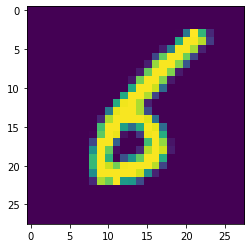

In [49]:
img_no = 145
print(np.argmax(mod.predict(x_test[img_no].reshape((1,28,28,1)))))
plt.imshow(x_test[img_no].reshape((28,28)))
print(np.argmax(y_test[img_no].numpy()))
